In [22]:
import pandas as pd
import seaborn as sns
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
%matplotlib inline

# Data Download

In [23]:
def download_file(url):
    filename = url.split('/')[-1]
    if not os.path.exists(filename):
        response = requests.get(url)
        open(filename, 'wb').write(response.content)
        print(f'{filename} downloaded')
    else:
        print(f'{filename} already exists')

In [24]:
download_file('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/dev.tsv')
download_file('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/test.tsv')
download_file('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/train.tsv')
download_file('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/emotions.txt')

dev.tsv already exists
test.tsv already exists
train.tsv already exists
emotions.txt already exists


In [25]:
df_train = pd.read_csv("train.tsv", sep="\t", names=["text","label", "id"])
df_val = pd.read_csv("dev.tsv", sep="\t", names=["text","label", "id"])
df_test = pd.read_csv("test.tsv", sep="\t", names=["text","label", "id"])
print(f"[Train] the dataframe shape: {df_train.shape}")
print(f"[Val] the dataframe shape: {df_val.shape}")
print(f"[Test] the dataframe shape: {df_test.shape}")

[Train] the dataframe shape: (43410, 3)
[Val] the dataframe shape: (5426, 3)
[Test] the dataframe shape: (5427, 3)


In [26]:
# Concat all datasets
df = pd.concat([df_train, df_val, df_test])


# Data Preprocessing

In [27]:
df

,text,label,id
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj
...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,15,efeeasc
5423,Well that makes sense.,4,ef9c7s3
5424,Daddy issues [NAME],27,efbiugo
5425,So glad I discovered that subreddit a couple m...,0,efbvgp9


In [28]:
df['List of classes'] = df['label'].apply(lambda x: x.split(','))
df['Len of classes'] = df['List of classes'].apply(lambda x: len(x))
print(f"max len of classes: {df['Len of classes'].max()}")

max len of classes: 5


In [29]:
df[df['Len of classes'] == 5]

,text,label,id,List of classes,Len of classes
7873,Yeah I probably would've started crying on the...,"9,12,14,19,25",ee6lqiq,"[9, 12, 14, 19, 25]",5


[45446, 8124, 655, 37, 1]


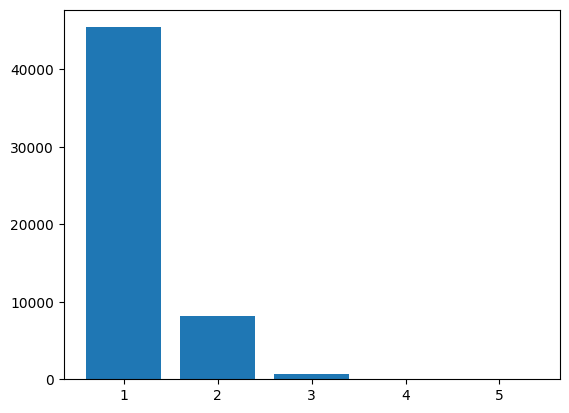

In [30]:
temp_df = df["Len of classes"].value_counts()
print(temp_df.to_list())
plt.bar(x=range(1,6), height=temp_df.to_list());

In [31]:
# from emotion.txt we get the labels for each for those emotions
label_to_emotion = {}
with open("emotions.txt") as f:
    for i,line in enumerate(f):
        label_to_emotion[str(i)] = line.strip("\n")
label_to_emotion

{'0': 'admiration',
 '1': 'amusement',
 '2': 'anger',
 '3': 'annoyance',
 '4': 'approval',
 '5': 'caring',
 '6': 'confusion',
 '7': 'curiosity',
 '8': 'desire',
 '9': 'disappointment',
 '10': 'disapproval',
 '11': 'disgust',
 '12': 'embarrassment',
 '13': 'excitement',
 '14': 'fear',
 '15': 'gratitude',
 '16': 'grief',
 '17': 'joy',
 '18': 'love',
 '19': 'nervousness',
 '20': 'optimism',
 '21': 'pride',
 '22': 'realization',
 '23': 'relief',
 '24': 'remorse',
 '25': 'sadness',
 '26': 'surprise',
 '27': 'neutral'}

In [32]:
for i in label_to_emotion:
    df[label_to_emotion[i]] = df['List of classes'].apply(lambda x: 1 if i in x else 0)

In [33]:
df.drop(['label', 'id', 'List of classes', 'Len of classes'], axis=1, inplace =True)
df

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5423,Well that makes sense.,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5424,Daddy issues [NAME],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5425,So glad I discovered that subreddit a couple m...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# taking only Joy, Sad, Angry, and Neutral
df = df[(df["joy"]==1) | (df["sadness"]==1) | (df["anger"]==1) | (df["fear"]==1) | (df["neutral"]==1)].loc[:,["text", "anger", "fear", "joy", "sadness", "neutral"]]
df.reset_index(drop=True, inplace=True)
df

,text,anger,fear,joy,sadness,neutral
0,My favourite food is anything I didn't have to...,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,1,0,0,0,0
3,To make her feel threatened,0,1,0,0,0
4,It might be linked to the trust factor of your...,0,0,0,0,1
...,...,...,...,...,...,...
23604,The essay is optional.,0,0,0,0,1
23605,Waiting for both of these things is torture,0,0,0,0,1
23606,Easy just include [NAME] to continue to tormen...,0,0,0,0,1
23607,Daddy issues [NAME],0,0,0,0,1


In [35]:
labels = ["anger", "fear", "joy", "sadness", "neutral"]
for index, row in df.iterrows():
    df.loc[index,"emotion"] = labels[np.argmax(row.iloc[1:].tolist())]

df

,text,anger,fear,joy,sadness,neutral,emotion
0,My favourite food is anything I didn't have to...,0,0,0,0,1,neutral
1,"Now if he does off himself, everyone will thin...",0,0,0,0,1,neutral
2,WHY THE FUCK IS BAYLESS ISOING,1,0,0,0,0,anger
3,To make her feel threatened,0,1,0,0,0,fear
4,It might be linked to the trust factor of your...,0,0,0,0,1,neutral
...,...,...,...,...,...,...,...
23604,The essay is optional.,0,0,0,0,1,neutral
23605,Waiting for both of these things is torture,0,0,0,0,1,neutral
23606,Easy just include [NAME] to continue to tormen...,0,0,0,0,1,neutral
23607,Daddy issues [NAME],0,0,0,0,1,neutral


# Data Visualization

In [36]:
filter_ = (df.drop(['text'], axis=1).sum(axis=1)>1) == True
print(f"sum of values where there is conflict: {filter_.sum()}")
# drop all rows where there is conflict
df.drop(index = df.loc[filter_].index, inplace=True)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

{'neutral': 17772, 'anger': 1960, 'joy': 1785, 'sadness': 1625, 'fear': 764}


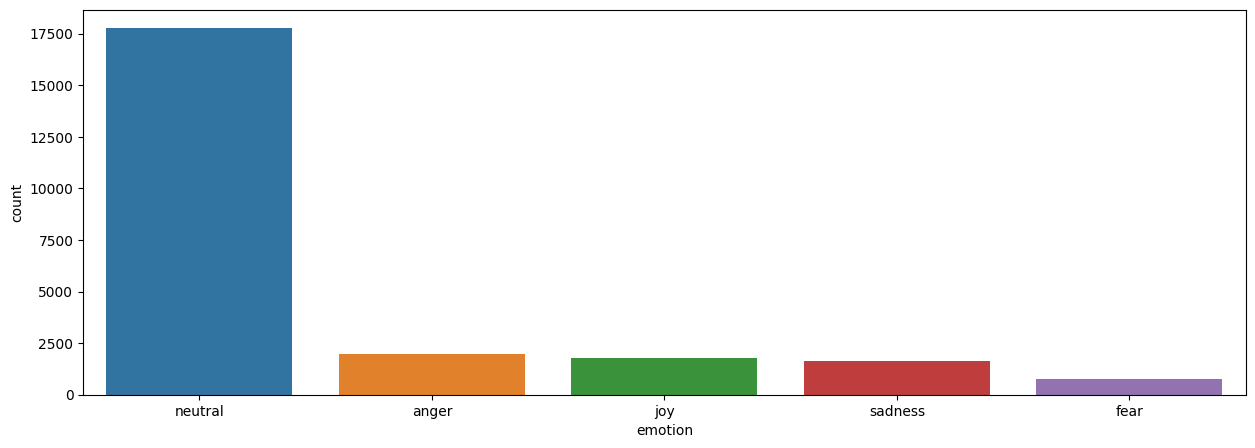

In [ ]:
temp_list = df.drop(['text'], axis=1).sum(axis=0).tolist()
counts= dict(zip(["anger", "fear", "joy", "sadness", "neutral"], temp_list))
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
print(sorted_counts)
counts_df = pd.DataFrame(sorted_counts.items(), columns=["emotion", "count"])
plt.subplots(figsize=(15,5))
sns.barplot(data = counts_df, x="emotion", y="count", order=counts_df['emotion']);

# Output

In [ ]:
df[["text", "emotion"]].to_csv("processed.csv", index=False)